In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
import pickle

# Load Dataset

In [ ]:
# Membaca file CSV
df = pd.read_csv('/data/CarPrice_Assignment_cleaned.csv')

In [ ]:
# Menampilkan baris awal dataset
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Modeling

In [ ]:
# Split Data
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modeling dengan XGBoost
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Menampilkan pentingnya fitur
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Fitur': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))

         Fitur  Importance
13  enginesize    0.851025
10  curbweight    0.036362
14  fuelsystem    0.022136
21  highwaympg    0.018490
22       brand    0.013044
18  horsepower    0.012747
11  enginetype    0.008640
16      stroke    0.007899
19     peakrpm    0.005879
8     carwidth    0.004500


In [ ]:
# Feature selection
selected_features = ['enginesize', 'highwaympg', 'curbweight', 'fuelsystem', 'brand', 'carlength', 'enginetype', 'stroke', 'horsepower', 'carwidth']

X = df[selected_features]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modeling dengan XGBoost
model = XGBRegressor(learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

# Evaluation

In [ ]:
# Evaluasi Model
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

MAE: 25314342.01
MSE: 1347081857523541.75
RMSE: 36702613.77
R2 Score: 0.9359


In [ ]:
# Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

print("Cross-Validation R2 per fold:", cv_scores)
print("Mean R2:", np.mean(cv_scores))

Cross-Validation R2 per fold: [0.93588586 0.89858865 0.90748054 0.92686614 0.92788999]
Mean R2: 0.9193422377234606


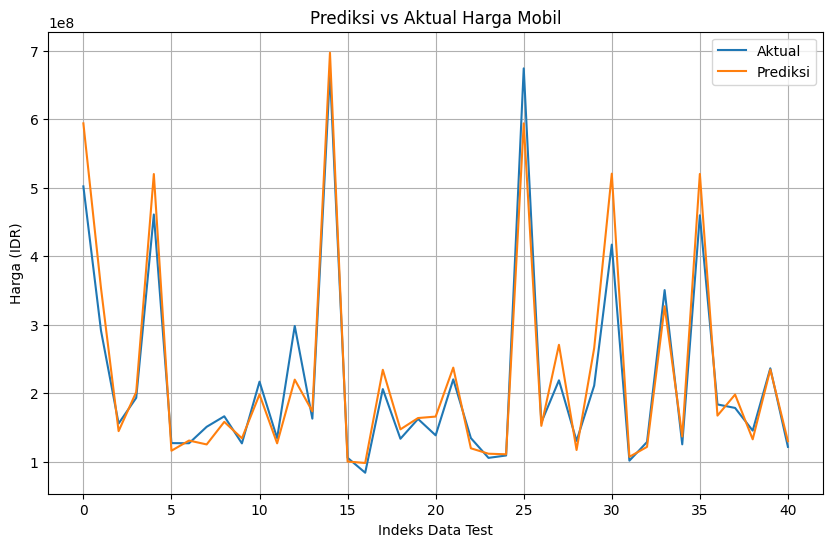

In [ ]:
# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Aktual')
plt.plot(y_pred, label='Prediksi')
plt.title('Prediksi vs Aktual Harga Mobil')
plt.xlabel('Indeks Data Test')
plt.ylabel('Harga (IDR)')
plt.legend()
plt.grid(True)
plt.show()

# Inference

In [ ]:
# Inference (Predict new data)
new_data = pd.DataFrame({
    'enginesize': [130],
    'highwaympg': [27],
    'curbweight': [2548],
    'fuelsystem': [0],
    'brand': [0],
    'carlength': [168.8],
    'enginetype': [0],
    'stroke': [2.68],
    'horsepower': [111],
    'carwidth': [64.1]
})

predicted_price = model.predict(new_data)

print(f"Prediksi harga mobil baru: Rp {predicted_price[0]:,.2f}")

Prediksi harga mobil baru: Rp 216,036,032.00


# Save Model

In [ ]:
# Save model ke .pkl
pickle.dump(model, open('../model/xgboost_model.pkl', 'wb'))